In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings

from mlxtend.plotting import plot_confusion_matrix


In [102]:
df = pd.read_csv("FoodData.csv")
df.head(10)

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy
5,Plant origin,Fruit,Tropical fruit,Avocado,Oral Allergy Syndrome
6,Plant origin,Vegetable,Miscellaneous vegetable,Bamboo shoot,Histamine Allergy
7,Plant origin,Fruit,Tropical fruit,Banana,Banana Allergy
8,Plant origin,Cereal grain and pulse,Cereal grain,Barley,Gluten Allergy
9,Plant origin,Cereal grain and pulse,Pulse,Bean,Legume Allergy


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    184 non-null    object
 1   Type     184 non-null    object
 2   Group    184 non-null    object
 3   Food     184 non-null    object
 4   Allergy  162 non-null    object
dtypes: object(5)
memory usage: 7.3+ KB


In [104]:
df.describe()

,Class,Type,Group,Food,Allergy
count,184,184,184,184,162
unique,3,14,33,183,39
top,Plant origin,Vegetable,Cruciferous vegetable,Peas,Legume Allergy
freq,146,64,15,2,14


In [105]:
df.isnull().sum()

Class       0
Type        0
Group       0
Food        0
Allergy    22
dtype: int64

In [106]:
print(df)

              Class                    Type                       Group  \
0      Plant origin            Nut and seed                    Oil seed   
1      Plant origin                   Fruit                  Pome fruit   
2      Plant origin                   Fruit                 Stone fruit   
3      Plant origin               Vegetable         Composite vegetable   
4      Plant origin               Vegetable        Liliaceous vegetable   
5      Plant origin                   Fruit              Tropical fruit   
6      Plant origin               Vegetable     Miscellaneous vegetable   
7      Plant origin                   Fruit              Tropical fruit   
8      Plant origin  Cereal grain and pulse                Cereal grain   
9      Plant origin  Cereal grain and pulse                       Pulse   
10     Plant origin                   Fruit                       Berry   
11     Plant origin  Cereal grain and pulse                       Pulse   
12     Plant origin      

In [107]:
print(df)

              Class                    Type                       Group  \
0      Plant origin            Nut and seed                    Oil seed   
1      Plant origin                   Fruit                  Pome fruit   
2      Plant origin                   Fruit                 Stone fruit   
3      Plant origin               Vegetable         Composite vegetable   
4      Plant origin               Vegetable        Liliaceous vegetable   
5      Plant origin                   Fruit              Tropical fruit   
6      Plant origin               Vegetable     Miscellaneous vegetable   
7      Plant origin                   Fruit              Tropical fruit   
8      Plant origin  Cereal grain and pulse                Cereal grain   
9      Plant origin  Cereal grain and pulse                       Pulse   
10     Plant origin                   Fruit                       Berry   
11     Plant origin  Cereal grain and pulse                       Pulse   
12     Plant origin      

<Axes: xlabel='Class', ylabel='count'>

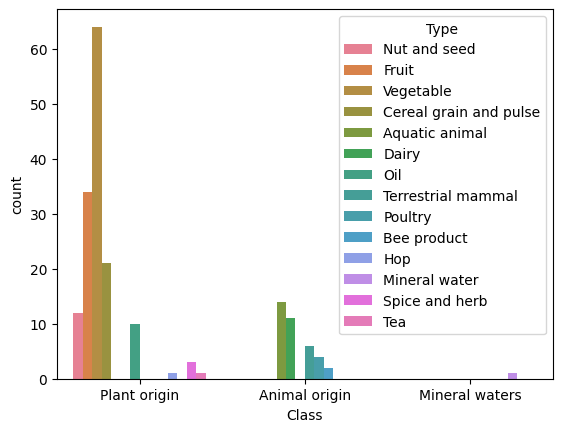

In [108]:
sns.countplot(data=df, x='Class', hue='Type')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


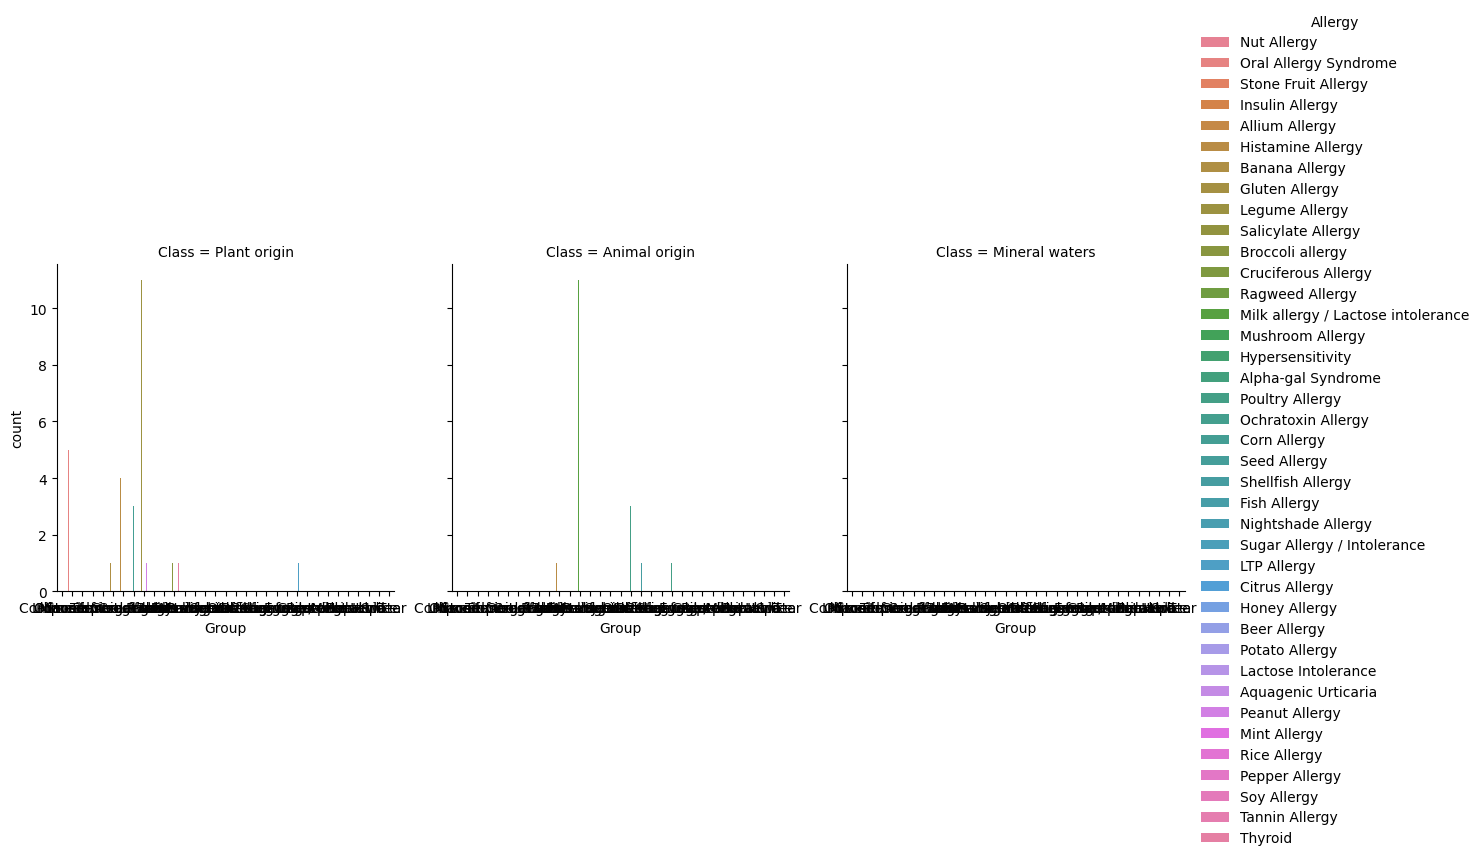

In [109]:
sns.catplot(data=df, x='Group', hue='Allergy', col='Class',
            kind='count', col_wrap=3, height=4)

<Axes: ylabel='count'>

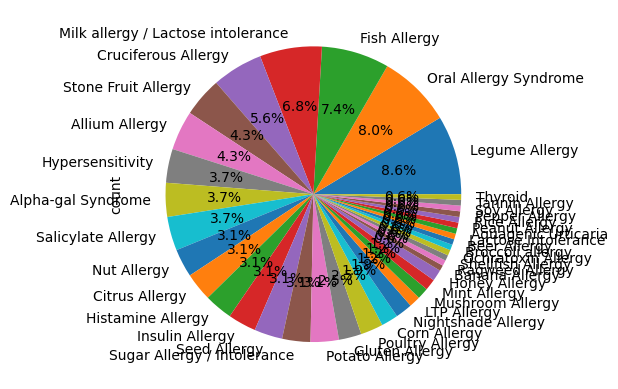

In [110]:
df['Allergy'].value_counts().plot.pie(autopct='%1.1f%%')

In [111]:
df['Allergy'] = df['Allergy'].fillna("None")

# Convert text (Class, Type, Group) into numbers the model can understand
le_class = LabelEncoder()
le_type = LabelEncoder()
le_group = LabelEncoder()
le_food = LabelEncoder()
le_allergy = LabelEncoder()

In [112]:
df['Class_Code'] = le_class.fit_transform(df['Class'])
df['Type_Code'] = le_type.fit_transform(df['Type'])
df['Group_Code'] = le_group.fit_transform(df['Group'])
df['Food_Code'] = le_food.fit_transform(df['Food'])
df['Allergy_Code'] = le_allergy.fit_transform(df['Allergy'])

In [133]:
df

,Class,Type,Group,Food,Allergy,Class_Code,Type_Code,Group_Code,Food_Code,Allergy_Code
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy,2,7,21,0,23
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome,2,4,22,1,25
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy,2,4,28,2,36
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy,2,13,5,3,14
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy,2,13,15,4,0
5,Plant origin,Fruit,Tropical fruit,Avocado,Oral Allergy Syndrome,2,4,31,5,25
6,Plant origin,Vegetable,Miscellaneous vegetable,Bamboo shoot,Histamine Allergy,2,13,17,6,11
7,Plant origin,Fruit,Tropical fruit,Banana,Banana Allergy,2,4,31,7,3
8,Plant origin,Cereal grain and pulse,Cereal grain,Barley,Gluten Allergy,2,2,3,8,10
9,Plant origin,Cereal grain and pulse,Pulse,Bean,Legume Allergy,2,2,24,9,17


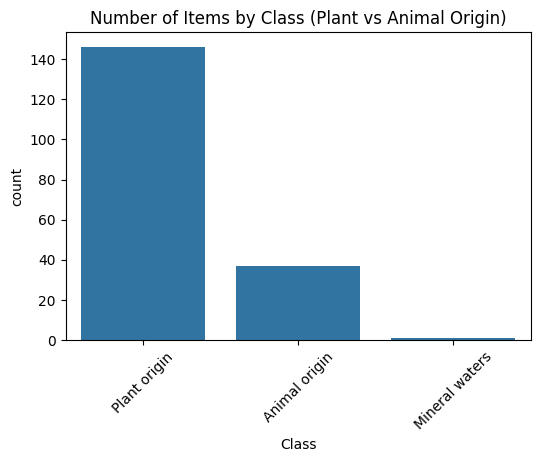

In [113]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class')
plt.title('Number of Items by Class (Plant vs Animal Origin)')
plt.xticks(rotation=45)
plt.show()

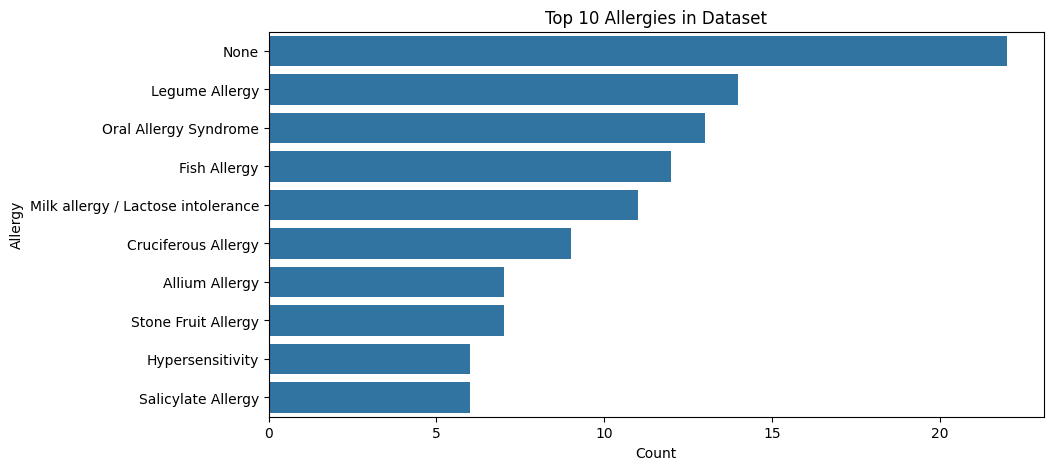

In [114]:
plt.figure(figsize=(10,5))
top_allergies = df['Allergy'].value_counts().head(10)
sns.barplot(x=top_allergies.values, y=top_allergies.index)
plt.title('Top 10 Allergies in Dataset')
plt.xlabel('Count')
plt.ylabel('Allergy')
plt.show()

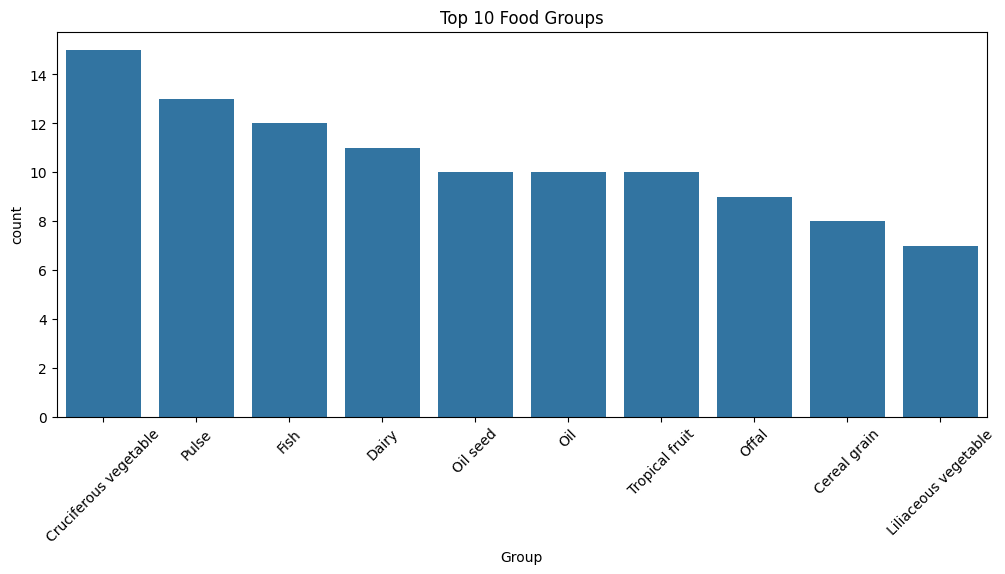

In [115]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Group', order=df['Group'].value_counts().index[:10])
plt.title('Top 10 Food Groups')
plt.xticks(rotation=45)
plt.show()

In [116]:
X = df[['Class_Code', 'Type_Code', 'Group_Code']]
y = df['Allergy_Code']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
modeldtc = DecisionTreeClassifier(random_state=42)
modeldtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [119]:
y_preddtc = modeldtc.predict(X_test)
accdtc = accuracy_score(y_test, y_preddtc)
print(f"Model accuracy: {accdtc:.2%}")

Model accuracy: 70.27%


In [120]:
with open('dtc.pkl', 'wb') as f:
    pickle.dump(DecisionTreeClassifier, f)
print("Model saved with pickle as 'dtc.pkl'")

Model saved with pickle as 'dtc.pkl'


In [121]:
cmdtc = confusion_matrix(y_test, y_preddtc)
print(cmdtc)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

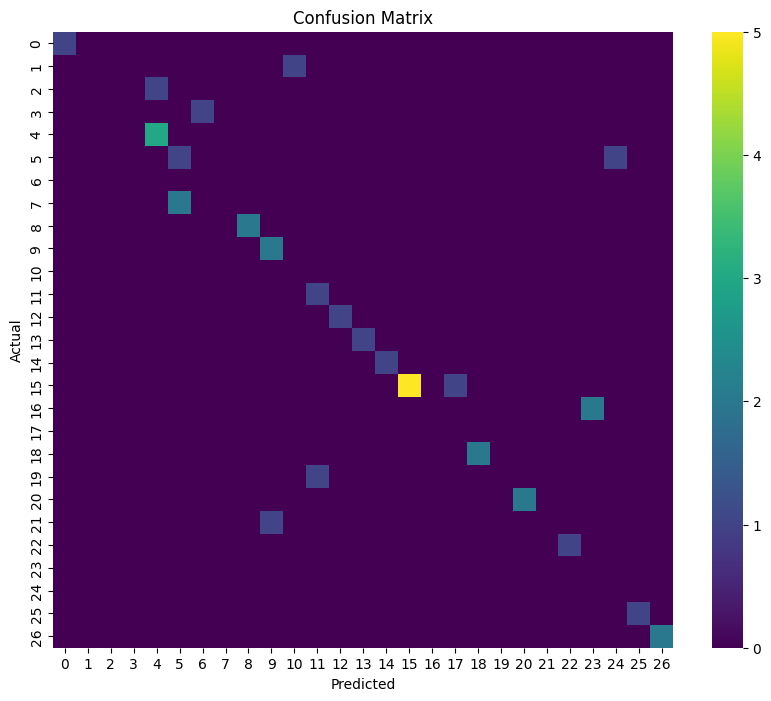

In [122]:

plt.figure(figsize=(10,8))
sns.heatmap(cmdtc, annot=False, cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [123]:
modellr = LogisticRegression(max_iter=1000)
modellr.fit(X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [124]:
y_predlr = modellr.predict(X_test)
acclr = accuracy_score(y_test, y_predlr)
print(f"Model accuracy: {acclr:.2%}")

Model accuracy: 40.54%


In [125]:
cmlr = confusion_matrix(y_test, y_predlr)
print(cmlr)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0

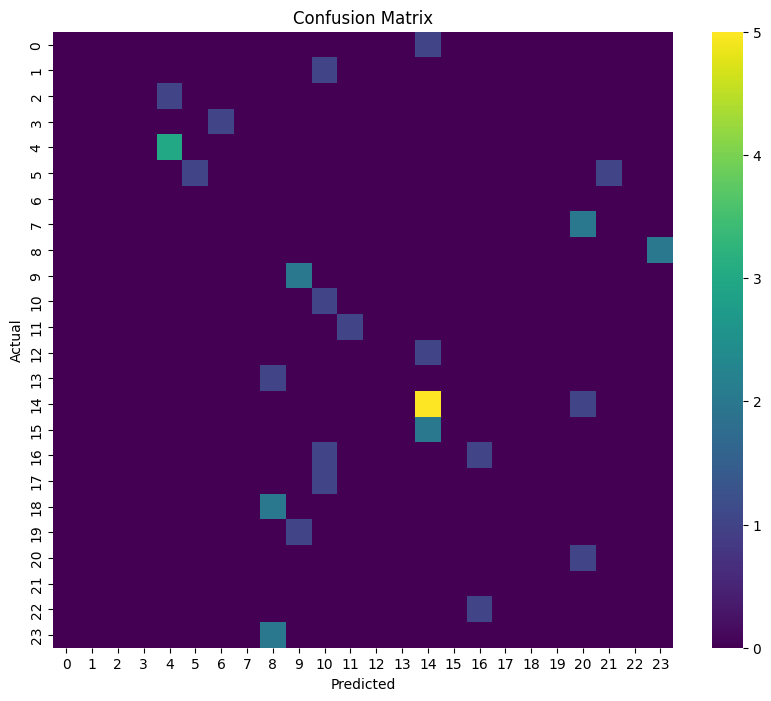

In [126]:

plt.figure(figsize=(10,8))
sns.heatmap(cmlr, annot=False, cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

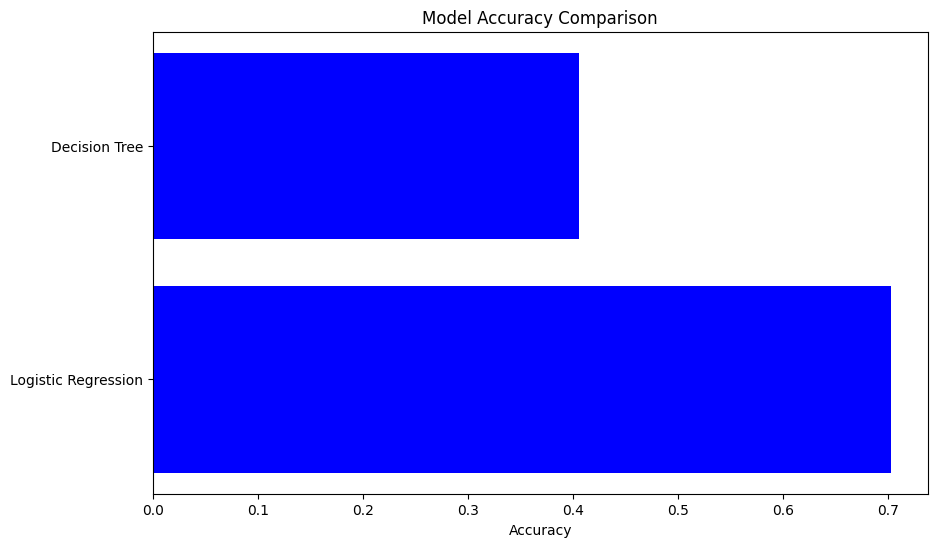

In [127]:
accuracies = [accdtc, acclr]
model_names = ['Logistic Regression', 'Decision Tree']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='blue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [128]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
}

In [129]:
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict on train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results.append((name, train_acc, test_acc))

# Display
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
print(results_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.564626       0.405405
1        Decision Tree        0.884354       0.702703


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


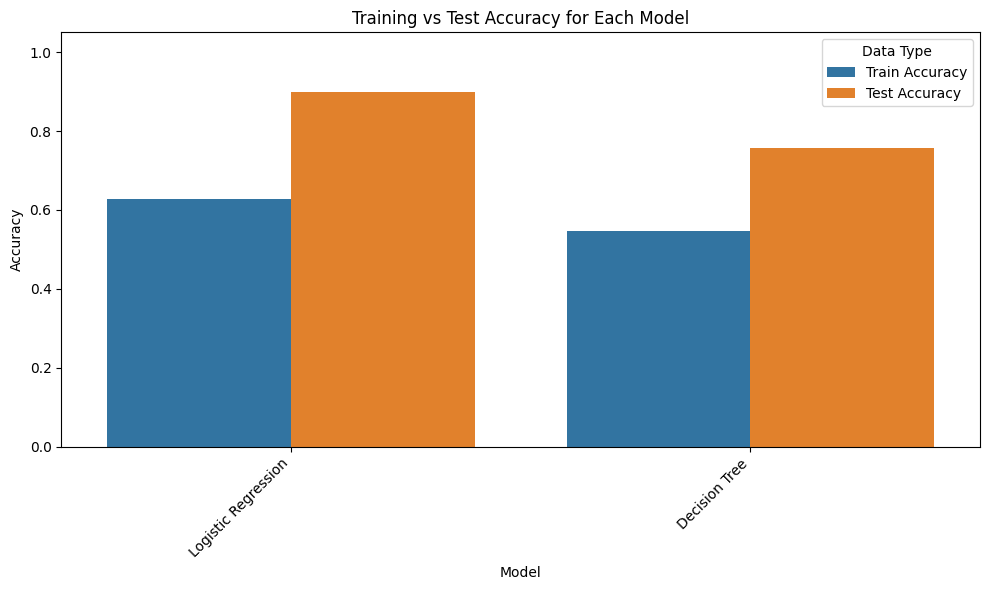

In [130]:
results_df = pd.DataFrame({
     'Model': ['Logistic Regression','Decision Tree'],
     'Train Accuracy': [0.627907, 0.545455],
     'Test Accuracy': [0.899225, 0.757576]
 })

plot_df = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                          var_name='Data Type', value_name='Accuracy')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Model', y='Accuracy', hue='Data Type')

plt.title('Training vs Test Accuracy for Each Model')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Data Type')

plt.tight_layout()

In [131]:
print(classification_report(y_test,y_preddtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       0.33      0.50      0.40         2
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       0.00      0.00      0.00         0
          17       0.50      1.00      0.67         1
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      0.83      0.91         6
          23       0.00      0.00      0.00         2
          24       0.00    

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565:

In [132]:
print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      0.50      0.67         2
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.67      1.00      0.80         2
          17       0.25      1.00      0.40         1
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.56      0.83      0.67         6
          23       0.00      0.00      0.00         2
          25       0.50      0.50      0.50         2
          26       0.00    

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: